# Tarea 2

In [1]:
import numpy as np
import scipy as sp
from scipy import interpolate 
import matplotlib.pyplot as plt

In [2]:
N=10

Usando interpolación lineal:

In [3]:
x=np.linspace(0,2*np.pi,N)
f=interpolate.interp1d(x,(np.sin(x))**2,kind="linear")

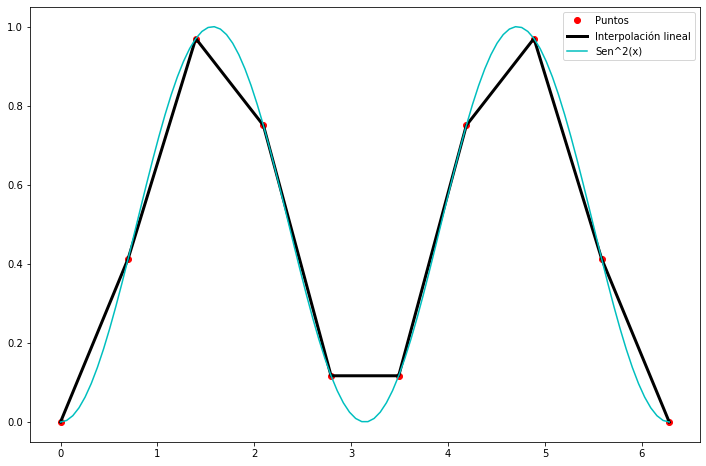

In [4]:
X=np.linspace(0,2*np.pi, 100)
plt.figure(figsize=(12,8))
plt.plot(x,f(x),"ro",label="Puntos")
plt.plot(X,f(X),"k-",lw=3,label="Interpolación lineal")
plt.plot(X,(np.sin(X))**2,"c-",label="Sen^2(x)")
plt.legend()

plt.show()

Usando interpolación de Lagrange: 

In [5]:
L=interpolate.lagrange(x,(np.sin(x))**2)
print(L)

            9            8           7          6         5         4
-7.589e-19 x - 0.001256 x + 0.03157 x - 0.3135 x + 1.548 x - 3.899 x
         3         2
 + 4.57 x - 2.022 x + 0.784 x


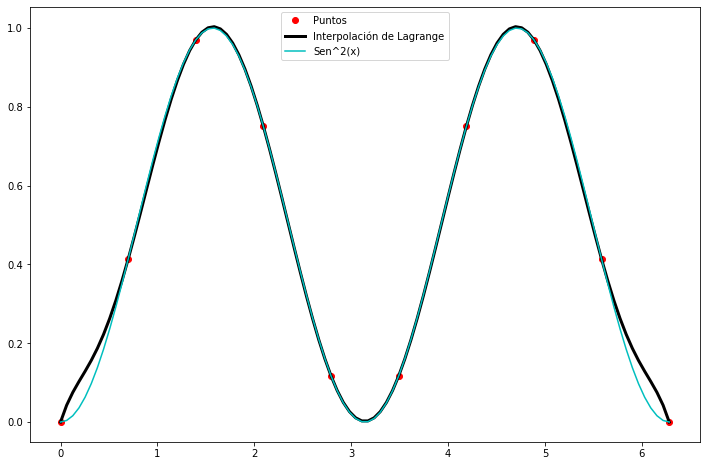

In [6]:
X=np.linspace(0,2*np.pi,100)
plt.figure(figsize=(12,8))
plt.plot(x,f(x),"ro",label="Puntos")
plt.plot(X,L(X),"k-",lw=3,label="Interpolación de Lagrange")
plt.plot(X,(np.sin(X))**2,"c-",label="Sen^2(x)")
plt.legend()

plt.show()

Usando Hermite:

In [7]:
y=(np.sin(x))**2
yprime=np.sin(2*x)
xdata=np.linspace(0,2*np.pi,10)

In [8]:
def hdiff(x, y, yprime):
    m = x.size
    l = 2*m
    z = np.zeros(l)
    a = np.zeros(l)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    for i in range(m):
        a[2*i] = y[i]
        a[2*i+1] = y[i]
    for i in np.flip(np.arange(1, m)): # Calcula la primera diferencia dividida
                                       # usando derivadas.
       a[2*i+1] = yprime[i]
       a[2*i] = (a[2*i]-a[2*i-1]) / (z[2*i]-z[2*i-1])
    a[1] = yprime[0]
    for j in range(2, l): # Calcula el resto de diferencias divididas.
        for i in np.flip(np.arange(j, l)):
            a[i]=(a[i]-a[i-1]) / (z[i]-z[i-j])
    return a
    
def hermite(x, y, yprime, w):
    m = x.size 
    a = hdiff(x, y, yprime)
    z = np.zeros(2*m)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    sum = a[0]
    pr = 1.0
    for j in range(2*m-1):
        pr *= w-z[j]
        sum += a[j+1]*pr
    return sum    
Hinterp = hermite(x, y, yprime, xdata)

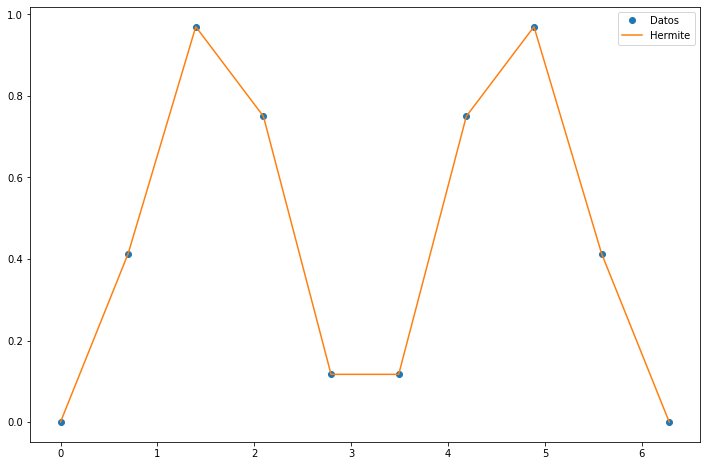

In [9]:
x=np.linspace(0,2*np.pi,10)

plt.figure(figsize=(12,8))
plt.plot(x,y,"o",label="Datos")
plt.plot(x,Hinterp,label="Hermite")
plt.show
plt.legend()